In [1]:
%matplotlib inline

import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import pickle



with open ('/home/aris/Desktop/image_survey_metrics.pickle', 'rb') as f:
    image_survey_metrics = pickle.load(f)
    
print 'The last year dataframe has '+ str(len(image_survey_metrics['user_id'].unique()))+' users.'
print image_survey_metrics.shape


The last year dataframe has 107 users.
(513714, 75)


In [2]:
#, u'user_id'
pick = [u'image_height', u'image_width', u'data_memorability',
       u'user_followed_by', u'user_follows', u'user_posted_photos',
       u'anp_sentiment', u'emotion_score', u'data_amz_label_confidence',
       u'face_id', u'face_gender_confidence', u'face_age_range_high',
       u'face_age_range_low', u'face_sunglasses', u'face_beard',
       u'face_beard_confidence', u'face_mustache', u'face_mustache_confidence',
       u'face_smile', u'face_smile_confidence', u'eyeglasses',
       u'eyeglasses_confidence', u'emo_confidence',
       u'PERMA', u'imagecount', u'comment_count',
       u'like_count']

dataset = image_survey_metrics[pick]
print dataset.shape
dataset.head()

(513714, 27)


,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id,...,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence,PERMA,imagecount,comment_count,like_count
0,640.0,640.0,0.746274,100.0,174.0,105.0,0.036,0.1634,99.085220,62.0,...,72.877548,True,96.86734,True,56.202072,3.136027,5.0,105.0,0.0,3.0
1,640.0,640.0,0.746274,100.0,174.0,105.0,0.036,0.1634,99.085220,62.0,...,72.877548,True,96.86734,True,56.202072,39.606640,5.0,105.0,0.0,3.0
2,640.0,640.0,0.746274,100.0,174.0,105.0,0.036,0.1634,99.085220,62.0,...,72.877548,True,96.86734,True,56.202072,10.424126,5.0,105.0,0.0,3.0
3,640.0,640.0,0.746274,100.0,174.0,105.0,0.036,0.1634,99.108864,62.0,...,72.877548,True,96.86734,True,56.202072,3.136027,5.0,105.0,0.0,3.0
4,640.0,640.0,0.746274,100.0,174.0,105.0,0.036,0.1634,99.108864,62.0,...,72.877548,True,96.86734,True,56.202072,39.606640,5.0,105.0,0.0,3.0


In [ ]:
# dataset = image_survey_metrics[pick]
# print dataset.shape
# dataset.head()

In [3]:
from dateutil.relativedelta import relativedelta
impordataset = image_survey_metrics[pick]
# print dataset.shape
# dataset.head()t datetime
print image_survey_metrics['start_q'].max()
print image_survey_metrics['start_q'].min()
print image_survey_metrics['end_q'].max()
print image_survey_metrics['end_q'].min()


def Get_Linear_Weight(peak_date,given_date, days_drop_interval = 90):
    '''
    Constructs a triangle which has a peak value of 1 in the peak_date 
    and then linearly descends until it reaches 0 in days_interval days
    
    type(peak_date) = datetime.datetime
    type(given_date) = datetime.datetime
    days_drop_interval = int
    
    Usage:
    
    peak_date=datetime.datetime(2017,10,20)
    given_date=datetime.datetime(2018,1,21)
    Get_Linear_Weight(peak_date,given_date,days_drop_interval=200)
    > 0.9535
    
    Get_Linear_Weight(peak_date,given_date,days_drop_interval=30)
    > 0
    '''
    #peak_date=datetime.datetime(peak_date)
    #given_date=datetime.datetime(given_date)
    diff = peak_date-given_date
    if abs(diff)>datetime.timedelta(days_drop_interval):
        return 0
    return 1-(abs(diff.days)/float(days_drop_interval))

2017-03-22 04:04:02
2016-12-05 14:01:26
2017-03-22 04:07:08
2016-12-05 14:02:52


In [ ]:
# image_survey_metrics['image_weight'] = \
# map(lambda img_date, survey_date: Get_Linear_Weight(given_date=img_date, peak_date=survey_date) \
#                                        , image_survey_metrics.image_posted_time, image_survey_metrics.end_q)

In [ ]:
# image_survey_metrics['image_weight'].head()

# Correlation

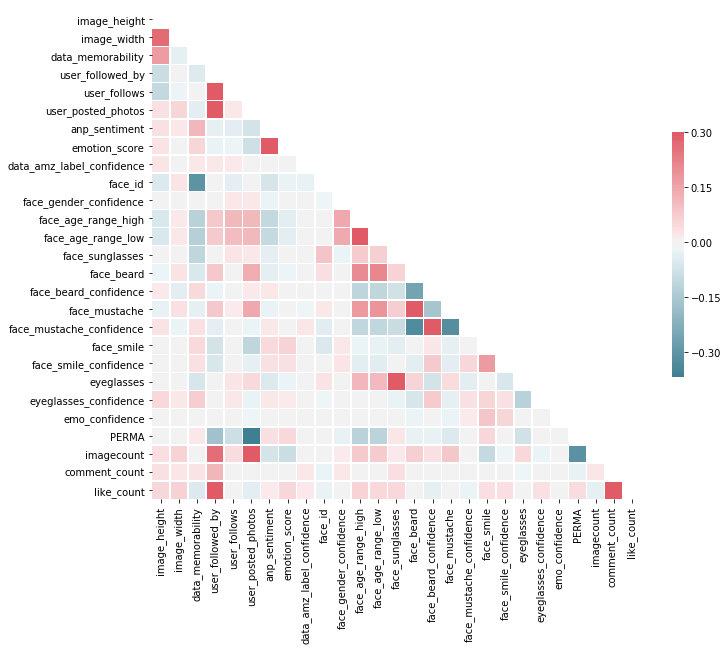

In [4]:
correlation_matrix = dataset.corr()
#correlation_matrix



mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Cross Validation

In [ ]:
from sklearn.cross_validation import train_test_split

# independent_variables = dataset[list(correlation_matrix)]
# dependent_variables = dataset['PERMA']

# x_train, x_test,  y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2)

# Analysis

In [ ]:
features = list(correlation_matrix)
features

In [5]:
def subtrack_features(main_list, subtr_features):
    
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    #print lm.params
    return lm

In [ ]:
#BEST K---detect the best combination of features
import random
import time
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


dependent_variables = dataset['PERMA']

features1= list(correlation_matrix)
features1.remove('PERMA')
features = []

# features= list(correlation_matrix)
# features.remove('PERMA')

features_list=[]
r2Score = []
MSE = []


start = time.time()

#for count,i in enumerate(range(len(features))):
for count,i in enumerate(features1):
    
    features.append(i)
    
    
    #create the independent variables
    independent_variables = dataset[list(correlation_matrix)]
    
    x_train, x_test,  y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2)
    
    #This creates a LinearRegression object
    lm = LinearRegression()
    # Train the model using the training sets
    lm.fit(x_train, y_train)
    
    # Make predictions using the testing set
    insta_y_pred = lm.predict(x_test)
    
    
    #STATMODEL
    frames = [ y_train,x_train]
    df = pd.concat(frames)
    
    lm1_model = regression_stats(prepare_set_statmodel(features),df)
    
    
    
    MSE.append(mean_squared_error(y_test, insta_y_pred))
    
    print lm1_model.rsquared_adj
    #r2Score.append(r2_score(y_test, insta_y_pred))
    r2Score.append(lm1_model.rsquared_adj)
    
    
    
    features_list.append('+'.join(features))
    
    
    features.remove(random.choice(features))
    
    if count == len(features):
    #if count == 2:
        
        break
        
        
end = time.time()
print(end - start)

In [ ]:
stats = pd.DataFrame(
    {'features': features_list,
     'Abjusted R2': r2Score,
     'MSE': MSE
    })

In [ ]:
stats

In [ ]:
stats.features[0]

In [6]:
#BEST K---detect the best combination of features
import random
import time
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


dependent_variables = dataset['PERMA']

# features1= list(correlation_matrix)
# features1.remove('PERMA')
# features = []

features= list(correlation_matrix)
features.remove('PERMA')

feature_exclude=[]

features_list=[]
r2Score = []
MSE = []


start = time.time()

temp_values = []


feature_store =list(correlation_matrix)
feature_store.remove('PERMA')

feature_extracted = []
for count,i in enumerate(range(len(features))):
#for count,i in enumerate(features1):

    features= list(correlation_matrix)
    features.remove('PERMA')
    
    
    while True:
        temp = random.choice(feature_store)
        
        if temp not in feature_exclude :
            
            feature_exclude.append(temp)
            
            break
    
    print str(temp)
    feature_extracted.append(temp)
    features.remove(temp)
    
    feature_store.remove(temp)
    
    #features.append(i)
    
    
    #create the independent variables
    independent_variables = dataset[list(correlation_matrix)]
    
    x_train, x_test,  y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2)
    
    #This creates a LinearRegression object
    lm = LinearRegression()
    # Train the model using the training sets
    lm.fit(x_train, y_train)
    
    # Make predictions using the testing set
    insta_y_pred = lm.predict(x_test)
    
    
    #STATMODEL
    frames = [ y_train,x_train]
    df = pd.concat(frames)
    
    lm1_model = regression_stats(prepare_set_statmodel(features),df)
    
    
    
    MSE.append(mean_squared_error(y_test, insta_y_pred))
    
    print lm1_model.rsquared_adj
    #r2Score.append(r2_score(y_test, insta_y_pred))
    r2Score.append(lm1_model.rsquared_adj)
    
    
    
    features_list.append('+'.join(features))
    
    
    #features.remove(random.choice(features))
    
    #if count == len(features):
    #if count == 2:
        
        #break
        
        
end = time.time()
print(end - start)

/home/aris/anaconda2/envs/tweets_USA/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


image_height
0.172259000101
face_age_range_low
0.172459039495
face_smile_confidence
0.171542473038
face_age_range_high
0.171727976538
emotion_score
0.171763147514
data_memorability
0.172434189977
eyeglasses
0.165834649652
data_amz_label_confidence
0.172653719857
face_mustache_confidence
0.172108146241
face_id
0.172428097842
face_gender_confidence
0.17246269956
like_count
0.169679367323
user_followed_by
0.171895303298
comment_count
0.170226130793
anp_sentiment
0.17231301687
eyeglasses_confidence
0.172642685386
face_beard
0.170733101909
face_beard_confidence
0.171990108965
face_smile
0.172109924561
user_follows
0.170575507762
face_mustache
0.172487722235
image_width
0.171836635055
emo_confidence
0.1719991055
user_posted_photos
0.126646220278
face_sunglasses
0.168921016032
imagecount
0.159899746891
1247.24459505


In [7]:
stats = pd.DataFrame(
    {'features': features_list,
     'Abjusted R2': r2Score,
     'MSE': MSE,
     'Extracted': feature_extracted
     
    })
stats

,Abjusted R2,Extracted,MSE,features
0,0.172259,image_height,5.148044e-30,image_width+data_memorability+user_followed_by...
1,0.172459,face_age_range_low,5.526522e-30,image_height+image_width+data_memorability+use...
2,0.171542,face_smile_confidence,7.736491e-30,image_height+image_width+data_memorability+use...
3,0.171728,face_age_range_high,3.728578e-30,image_height+image_width+data_memorability+use...
4,0.171763,emotion_score,6.328458e-30,image_height+image_width+data_memorability+use...
5,0.172434,data_memorability,4.778178e-30,image_height+image_width+user_followed_by+user...
6,0.165835,eyeglasses,5.753700e-30,image_height+image_width+data_memorability+use...
7,0.172654,data_amz_label_confidence,1.274253e-29,image_height+image_width+data_memorability+use...
8,0.172108,face_mustache_confidence,5.515581e-30,image_height+image_width+data_memorability+use...
9,0.172428,face_id,2.124311e-30,image_height+image_width+data_memorability+use...


In [ ]:
stats

In [ ]:
list(correlation_matrix)

In [ ]:
stats.features[25]

In [ ]:
features = [u'imagecount',u'user_posted_photos',u'face_sunglasses',u'eyeglasses']

In [ ]:
lm1_model = regression_stats(prepare_set_statmodel(features),dataset)
lm1_model.summary()

In [1]:
import pickle

with open ('data_extracted.pickle','wb') as f:
    pickle.dump(stats,f)

NameError: name 'stats' is not defined

In [2]:
with open ('data_extracted.pickle','wb') as f:
    df= pickle.load(f)

IOError: File not open for reading